In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from scipy.signal import convolve2d
from scipy.optimize import curve_fit

In [2]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 2})

def findMoment(arr,order,shift=0):
    # Shift i to i - 50
    shifted_indices = np.arange(len(arr)) - (len(arr)/2) - shift
    
    zero = np.average(arr[0:10])

    # return np.sum(shifted_indices**order * (arr-np.min(arr))) / np.sum(arr-np.min(arr))
    return np.sum(shifted_indices**order * (np.abs(arr-zero)) / np.sum(np.abs(arr-zero)))

## Correlation Rnd Diagonal Hopping Interaction

### no drive
100 * 100 * 200, pgen=0.01, T=1000 nsim=1000, 1

50 * 50 * 200, pgen=0.01, T=1000 nsim=1000, 2

150 * 150 * 200, pgen=0.01, T=1000 nsim=1000, 3

150 * 150 * 400, pgen=0.01, T=1000 nsim=200, 4

In [60]:
file_name = "../data/241210/241210_4_"
x_l = np.loadtxt(file_name+'pcoor_scanx.csv',skiprows=1)
y_l = np.loadtxt(file_name+'pcoor_scany.csv',skiprows=1)
t_l = np.loadtxt(file_name+'pcoor_scanz.csv',skiprows=1)
raw = np.loadtxt(file_name+'pcoor_data.csv',skiprows=1,delimiter=',')
pcoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'ncoor_data.csv',skiprows=1,delimiter=',')
ncoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'scoor_data.csv',skiprows=1,delimiter=',')
scoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')

mid_lattice = int(len(x_l)/2)

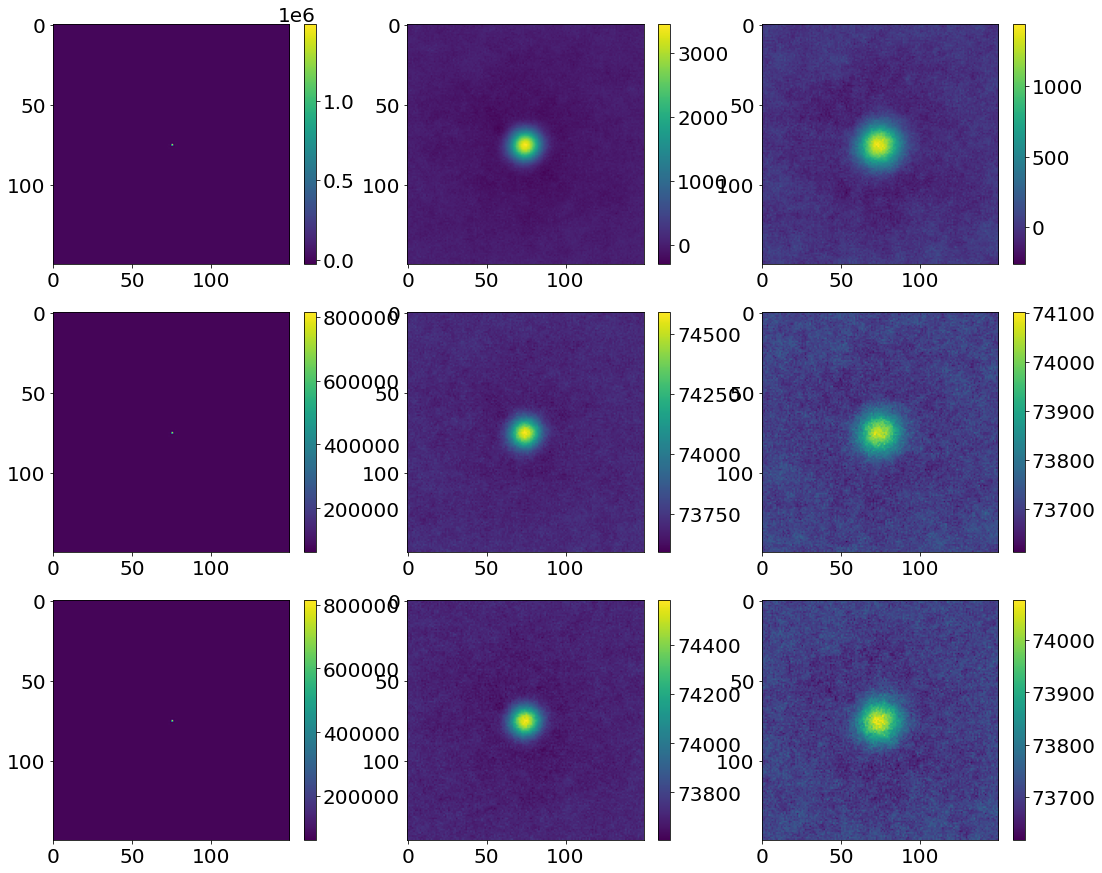

In [61]:
t1 = 0
t2 = 50
t3 = 100

plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
scoor_r = np.roll(scoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,2)
scoor_r = np.roll(scoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,3)
scoor_r = np.roll(scoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,4)
pcoor_r = np.roll(pcoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,5)
pcoor_r = np.roll(pcoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,6)
pcoor_r = np.roll(pcoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,7)
ncoor_r = np.roll(ncoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,8)
ncoor_r = np.roll(ncoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,9)
ncoor_r = np.roll(ncoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()

test charge neutrality

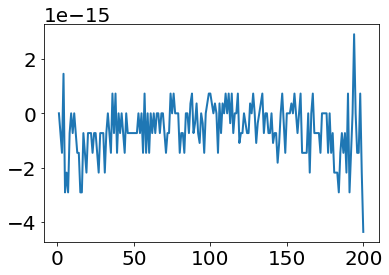

In [28]:
plt.plot(t_l,np.average(scoor[:,:,:],axis=(0,1)))

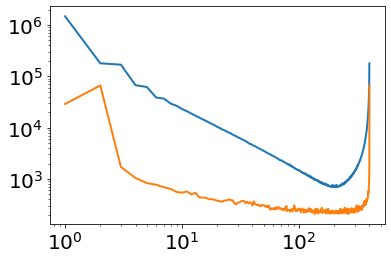

In [62]:
plt.plot(t_l,np.max(scoor[:,:,:],axis=(0,1)))
plt.plot(t_l,-np.min(scoor[:,:,:],axis=(0,1)))
plt.xscale('log')
plt.yscale('log')

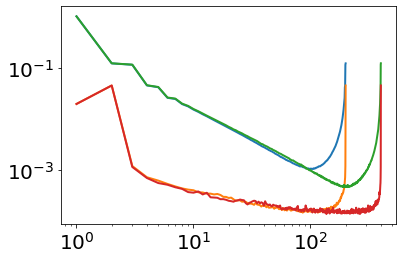

In [66]:
file_name = "../data/241210/241210_3_"
x_l = np.loadtxt(file_name+'pcoor_scanx.csv',skiprows=1)
y_l = np.loadtxt(file_name+'pcoor_scany.csv',skiprows=1)
t_l = np.loadtxt(file_name+'pcoor_scanz.csv',skiprows=1)
raw = np.loadtxt(file_name+'pcoor_data.csv',skiprows=1,delimiter=',')
pcoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'ncoor_data.csv',skiprows=1,delimiter=',')
ncoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'scoor_data.csv',skiprows=1,delimiter=',')
scoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')

plt.plot(t_l,np.max(scoor[:,:,:],axis=(0,1)) / np.max(scoor[:,:,0],axis=(0,1)))
plt.plot(t_l,-np.min(scoor[:,:,:],axis=(0,1)) / np.max(scoor[:,:,0],axis=(0,1)))

file_name = "../data/241210/241210_4_"
x_l = np.loadtxt(file_name+'pcoor_scanx.csv',skiprows=1)
y_l = np.loadtxt(file_name+'pcoor_scany.csv',skiprows=1)
t_l = np.loadtxt(file_name+'pcoor_scanz.csv',skiprows=1)
raw = np.loadtxt(file_name+'pcoor_data.csv',skiprows=1,delimiter=',')
pcoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'ncoor_data.csv',skiprows=1,delimiter=',')
ncoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'scoor_data.csv',skiprows=1,delimiter=',')
scoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')

plt.plot(t_l,np.max(scoor[:,:,:],axis=(0,1)) / np.max(scoor[:,:,0],axis=(0,1)))
plt.plot(t_l,-np.min(scoor[:,:,:],axis=(0,1)) / np.max(scoor[:,:,0],axis=(0,1)))

plt.xscale('log')
plt.yscale('log')


#### Gaussian fit

In [304]:
def gaussian_2d(coor, x0, y0, sigma_x, sigma_y, amplitude, offset):
    """2D Gaussian function."""
    x = coor[0]
    y = coor[1]
    return offset + amplitude * np.exp(
        -(((x - x0) ** 2) / (2 * sigma_x ** 2) + ((y - y0) ** 2) / (2 * sigma_y ** 2))
    )

params_l = []
# for t in range(int(scoor.shape[-1]/2)):
for t in range(200):
    scoor_t = np.roll(scoor[:,:,t],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
    # Get the coordinates of the pixels
    x = np.arange(0, scoor_t.shape[1])
    y = np.arange(0, scoor_t.shape[0])
    x, y = np.meshgrid(x, y)

    # Flatten the arrays for fitting
    x = x.ravel()
    y = y.ravel()
    z = scoor_t.ravel()

    # Initial guess for the parameters
    initial_guess = (scoor_t.shape[1] / 2, scoor_t.shape[0] / 2, 1, 1, np.max(scoor_t), np.min(scoor_t))
    
    # Fit the data
    params, _ = curve_fit(gaussian_2d, (x, y), z, p0=initial_guess)

    # Extract the parameters
    x0, y0, sigma_x, sigma_y, amplitude, offset = params
    params_l.append(params)

params_l = np.array(params_l)
params_l.shape

IndexError: index 50 is out of bounds for axis 2 with size 50

TypeError: list indices must be integers or slices, not tuple

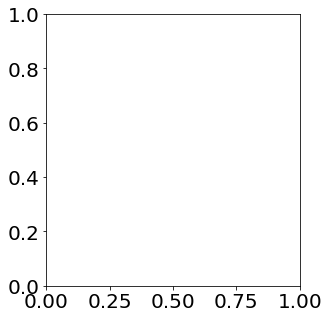

In [305]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot((params_l[:,2]+params_l[:,3])/2,'.-')
plt.plot(params_l[:,3],'.-')
# plt.ylim(1e0,1e1)
plt.xscale('log')
plt.yscale('log')
plt.subplot(1,2,2)
plt.plot(params_l[:,4])
plt.xscale('log')
plt.yscale('log')

In [306]:
slope_start = 10
slope_end = 100

tfit_l = np.arange(slope_start,slope_end,dtype=int)
m, b = np.polyfit(np.log(tfit_l), np.log((params_l[slope_start:slope_end,2]+params_l[slope_start:slope_end,3])/2), 1)
print("var exponents", m)
m, b = np.polyfit(np.log(tfit_l), np.log(params_l[slope_start:slope_end,4]), 1)
print("var exponents", m)

TypeError: list indices must be integers or slices, not tuple

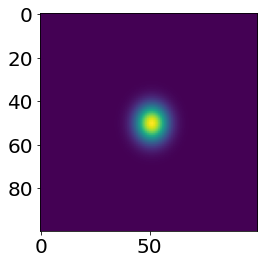

In [42]:
fitted_gaussian = gaussian_2d((x, y), *params).reshape(scoor_t.shape)
plt.imshow(fitted_gaussian)


#### Moment along the parallel cut

In [330]:
tm_l = np.arange(10,200)
m1_l = np.zeros(tm_l.shape)
m2_l = np.zeros(tm_l.shape)
m3_l = np.zeros(tm_l.shape)
m4_l = np.zeros(tm_l.shape)
m5_l = np.zeros(tm_l.shape)
m6_l = np.zeros(tm_l.shape)
m7_l = np.zeros(tm_l.shape)
m8_l = np.zeros(tm_l.shape)

for idx, tm in enumerate(tm_l):
    scoor_r = np.roll(scoor[:,:,tm],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
    m1_l[idx] = findMoment(scoor_r[:,mid_lattice],1)
    m2_l[idx] = findMoment(scoor_r[:,mid_lattice],2,shift=m1_l[idx])
    m3_l[idx] = findMoment(scoor_r[:,mid_lattice],3,shift=m1_l[idx])
    m4_l[idx] = findMoment(scoor_r[:,mid_lattice],4,shift=m1_l[idx])
    m5_l[idx] = findMoment(scoor_r[:,mid_lattice],5,shift=m1_l[idx])
    m6_l[idx] = findMoment(scoor_r[:,mid_lattice],6,shift=m1_l[idx])
    m7_l[idx] = findMoment(scoor_r[:,mid_lattice],7,shift=m1_l[idx])
    m8_l[idx] = findMoment(scoor_r[:,mid_lattice],8,shift=m1_l[idx])

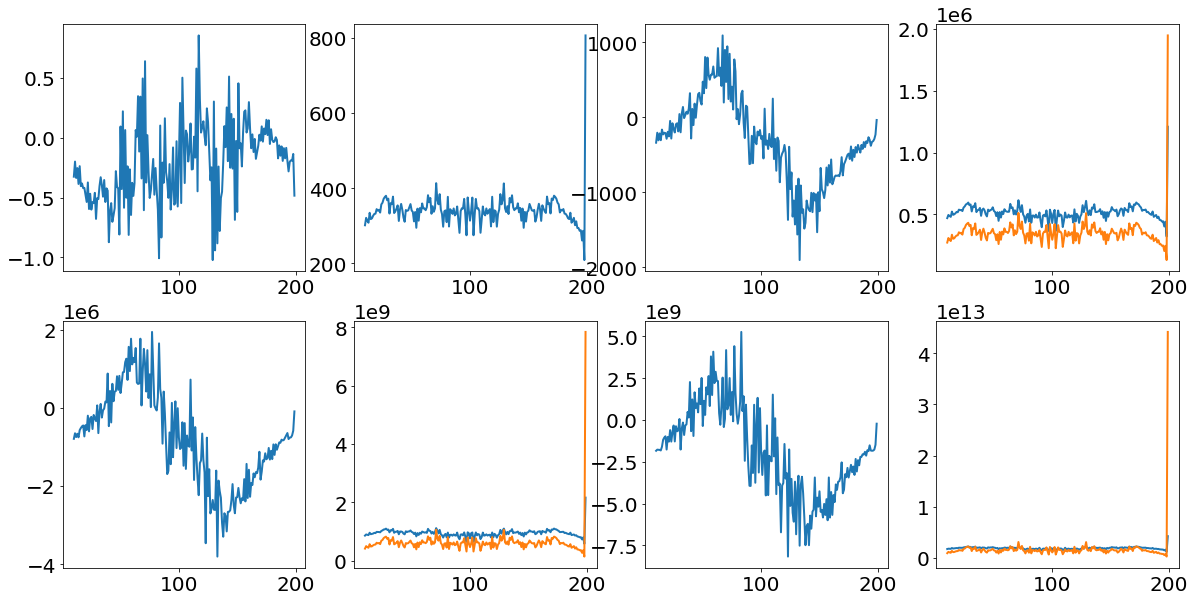

In [331]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.plot(tm_l,m1_l)
plt.subplot(2,4,2)
plt.plot(tm_l,m2_l)
plt.subplot(2,4,3)
plt.plot(tm_l,m3_l)
plt.subplot(2,4,4)
plt.plot(tm_l,m4_l)
plt.plot(tm_l,3*m2_l**2)
plt.subplot(2,4,5)
plt.plot(tm_l,m5_l)
plt.subplot(2,4,6)
plt.plot(tm_l,m6_l)
plt.plot(tm_l,15*m2_l**3)
plt.subplot(2,4,7)
plt.plot(tm_l,m7_l)
plt.subplot(2,4,8)
plt.plot(tm_l,m8_l)
plt.plot(tm_l,105*m2_l**4)

#### moment along the perpendicular cut

In [332]:
tm_l = np.arange(10,200)
m1_l = np.zeros(tm_l.shape)
m2_l = np.zeros(tm_l.shape)
m3_l = np.zeros(tm_l.shape)
m4_l = np.zeros(tm_l.shape)
m5_l = np.zeros(tm_l.shape)
m6_l = np.zeros(tm_l.shape)
m7_l = np.zeros(tm_l.shape)
m8_l = np.zeros(tm_l.shape)

for idx, tm in enumerate(tm_l):
    scoor_r = np.roll(scoor[:,:,tm],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
    m1_l[idx] = findMoment(scoor_r[mid_lattice,:],1)
    m2_l[idx] = findMoment(scoor_r[mid_lattice,:],2,shift=m1_l[idx])
    m3_l[idx] = findMoment(scoor_r[mid_lattice,:],3,shift=m1_l[idx])
    m4_l[idx] = findMoment(scoor_r[mid_lattice,:],4,shift=m1_l[idx])
    m5_l[idx] = findMoment(scoor_r[mid_lattice,:],5,shift=m1_l[idx])
    m6_l[idx] = findMoment(scoor_r[mid_lattice,:],6,shift=m1_l[idx])
    m7_l[idx] = findMoment(scoor_r[mid_lattice,:],7,shift=m1_l[idx])
    m8_l[idx] = findMoment(scoor_r[mid_lattice,:],8,shift=m1_l[idx])

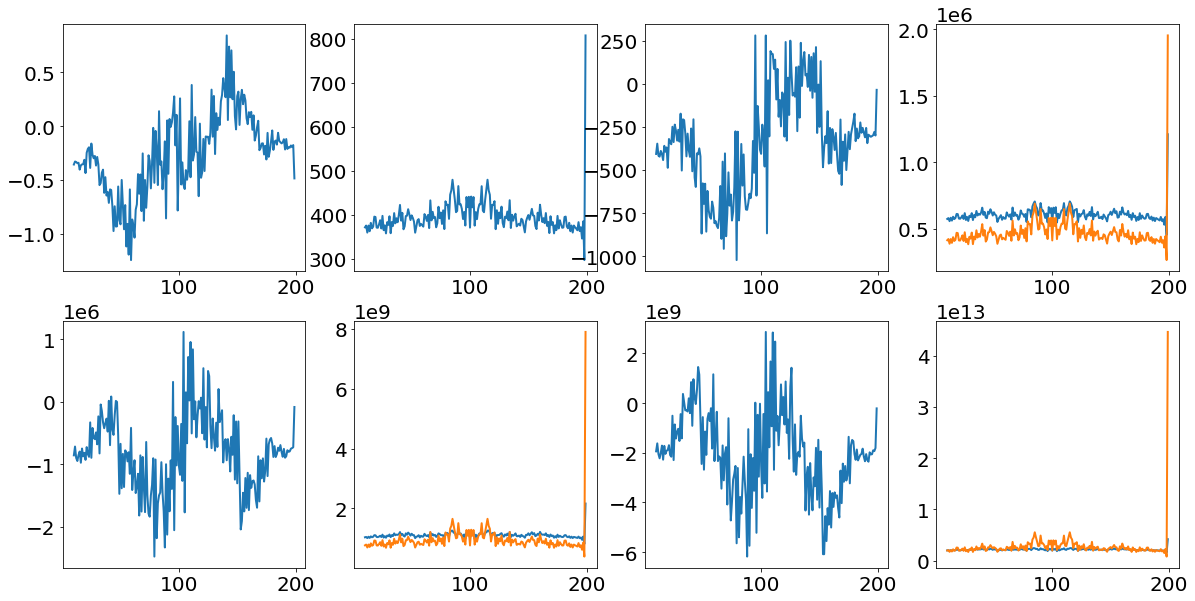

In [333]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.plot(tm_l,m1_l)
plt.subplot(2,4,2)
plt.plot(tm_l,m2_l)
plt.subplot(2,4,3)
plt.plot(tm_l,m3_l)
plt.subplot(2,4,4)
plt.plot(tm_l,m4_l)
plt.plot(tm_l,3*m2_l**2)
plt.subplot(2,4,5)
plt.plot(tm_l,m5_l)
plt.subplot(2,4,6)
plt.plot(tm_l,m6_l)
plt.plot(tm_l,15*m2_l**3)
plt.subplot(2,4,7)
plt.plot(tm_l,m7_l)
plt.subplot(2,4,8)
plt.plot(tm_l,m8_l)
plt.plot(tm_l,105*m2_l**4)

### Drive
pgen=0.001, pdr=0.5, T= 1 ... 100 nsim=100, 21-24

pgen=0.01, pdr=0.5, T= 1 ... 100 nsim=100, 25-28

pgen=0.01, pdr=0.5, T= 1...100 nsim=1000, 41-44

pgen=0.01, pdr=0.5, T= 10...100 nsim=100, 61-68

In [366]:
file_name = "../data/241210/241210_68_"
x_l = np.loadtxt(file_name+'pcoor_scanx.csv',skiprows=1)
y_l = np.loadtxt(file_name+'pcoor_scany.csv',skiprows=1)
t_l = np.loadtxt(file_name+'pcoor_scanz.csv',skiprows=1)
raw = np.loadtxt(file_name+'pcoor_data.csv',skiprows=1,delimiter=',')
pcoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'ncoor_data.csv',skiprows=1,delimiter=',')
ncoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'scoor_data.csv',skiprows=1,delimiter=',')
scoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')

mid_lattice = int(len(x_l)/2)

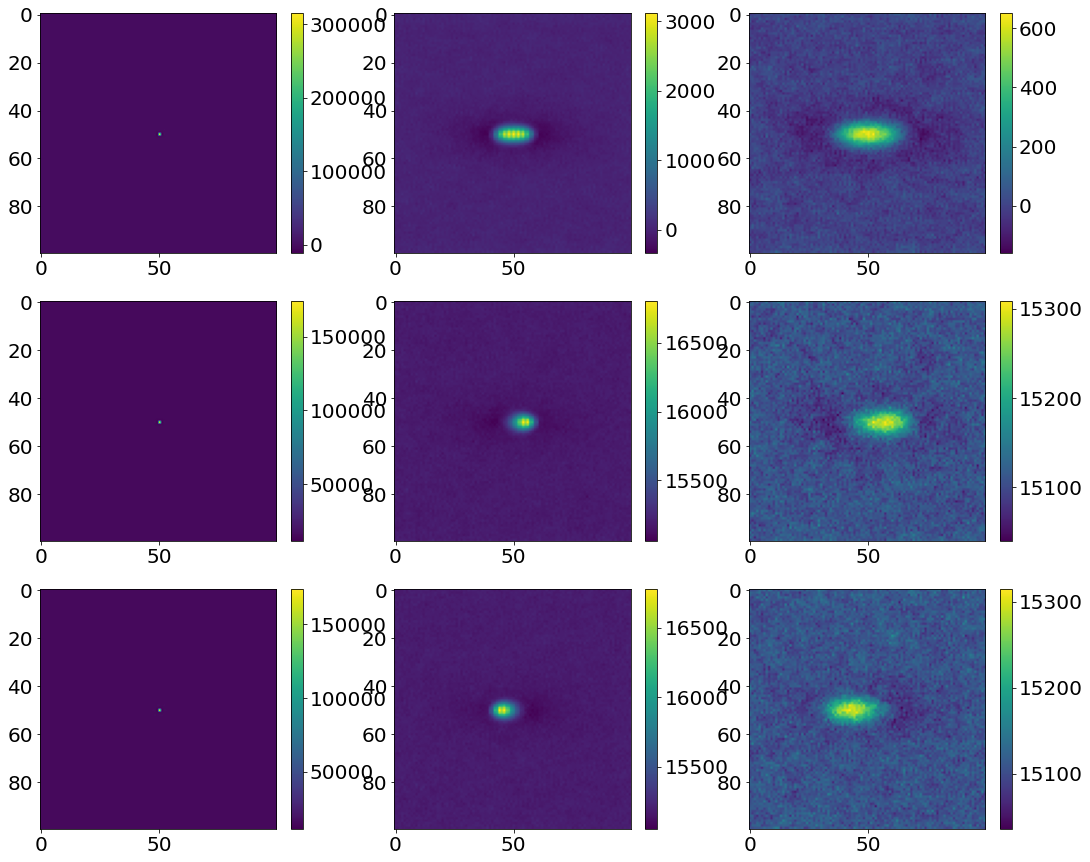

In [367]:
t1 = 0
t2 = 10
t3 = 30

plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
scoor_r = np.roll(scoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,2)
scoor_r = np.roll(scoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,3)
scoor_r = np.roll(scoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,4)
pcoor_r = np.roll(pcoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,5)
pcoor_r = np.roll(pcoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,6)
pcoor_r = np.roll(pcoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,7)
ncoor_r = np.roll(ncoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,8)
ncoor_r = np.roll(ncoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,9)
ncoor_r = np.roll(ncoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()

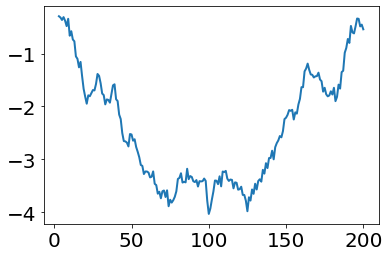

In [374]:
plt.plot(t_l[2:], np.average(scoor[30:70,30:70],axis=(0,1))[2:])

In [380]:
np.average(scoor[:,:,0],axis=(0,1))

-1.1641532182693482e-14

(array([[ 0.,  5., 33., 44.,  5.,  2.,  4.,  1.,  6.,  0.],
        [ 0.,  2., 39., 36.,  9.,  2.,  2.,  5.,  5.,  0.],
        [ 0., 10., 37., 29., 10.,  2.,  3.,  5.,  4.,  0.],
        [ 0.,  7., 37., 35.,  7.,  4.,  0.,  5.,  5.,  0.],
        [ 0.,  3., 47., 28.,  9.,  3.,  2.,  6.,  2.,  0.],
        [ 0., 11., 31., 36.,  9.,  3.,  3.,  5.,  2.,  0.],
        [ 0.,  9., 37., 32., 11.,  2.,  4.,  1.,  4.,  0.],
        [ 0., 12., 30., 40.,  7.,  4.,  5.,  2.,  0.,  0.],
        [ 1.,  8., 26., 46.,  8.,  3.,  2.,  5.,  1.,  0.],
        [ 0.,  4., 31., 45., 11.,  3.,  5.,  1.,  0.,  0.],
        [ 1.,  5., 37., 36., 10.,  5.,  6.,  0.,  0.,  0.],
        [ 0.,  4., 28., 48., 11.,  6.,  2.,  1.,  0.,  0.],
        [ 1.,  7., 30., 41., 15.,  3.,  3.,  0.,  0.,  0.],
        [ 0., 10., 22., 48., 12.,  5.,  3.,  0.,  0.,  0.],
        [ 0.,  6., 28., 45., 17.,  4.,  0.,  0.,  0.,  0.],
        [ 0., 10., 26., 41., 20.,  3.,  0.,  0.,  0.,  0.],
        [ 0.,  8., 36., 44., 11.,  1.,  

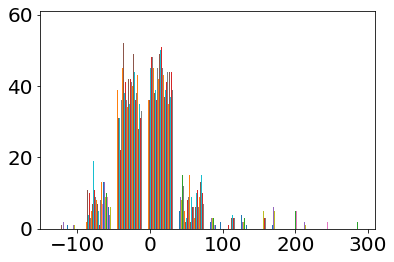

In [386]:
plt.hist(scoor[:,:,50])

## Current
100 * 100 * 200, pgen=0.001, T=10 nsim=100, 31

50 * 50 * 200, pgen=0.001, T=10 nsim=100, 32

In [419]:
file_name = "../data/241210/241210_31_"
x_l = np.loadtxt(file_name+'pcoor_scanx.csv',skiprows=1)
y_l = np.loadtxt(file_name+'pcoor_scany.csv',skiprows=1)
t_l = np.loadtxt(file_name+'pcoor_scanz.csv',skiprows=1)
raw = np.loadtxt(file_name+'pcoor_data.csv',skiprows=1,delimiter=',')
pcoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'ncoor_data.csv',skiprows=1,delimiter=',')
ncoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'scoor_data.csv',skiprows=1,delimiter=',')
scoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'current_data.csv',skiprows=1,delimiter=',')
current = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')

mid_lattice = int(len(x_l)/2)
print(len(x_l),len(y_l),len(t_l))

100 100 200


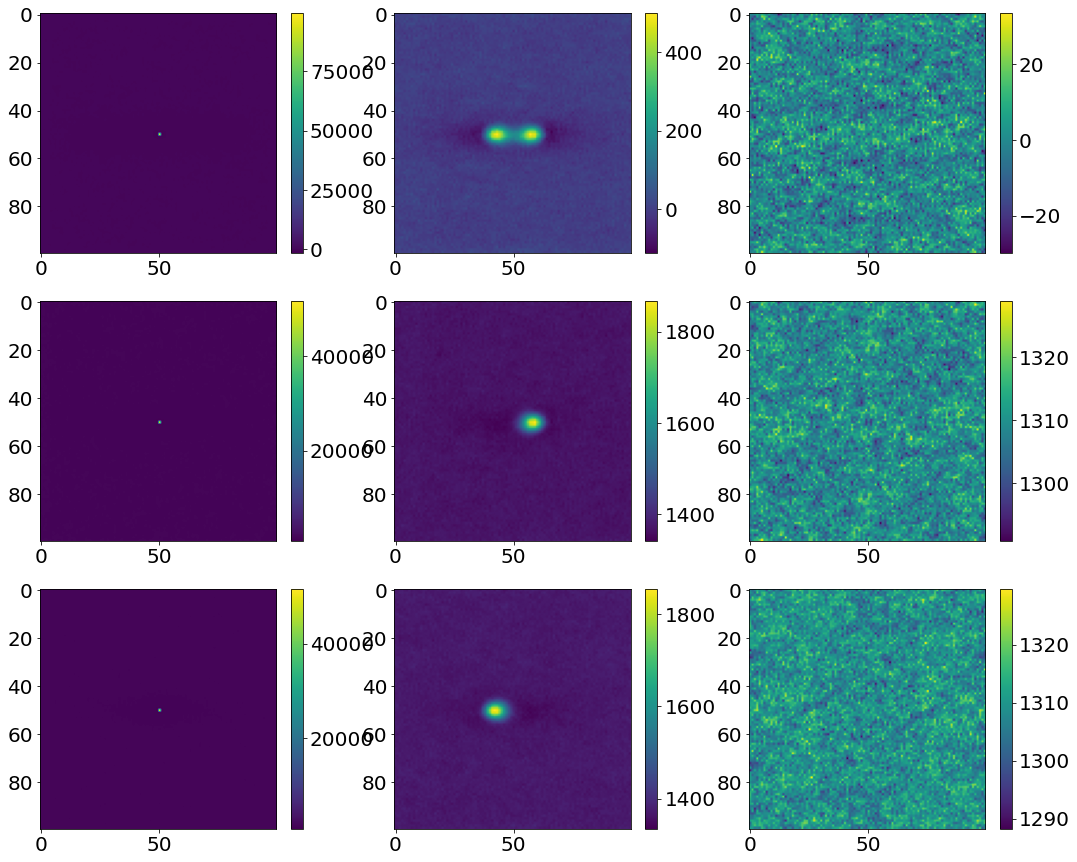

In [420]:
t1 = 0
t2 = 15
t3 = 100

plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
scoor_r = np.roll(scoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,2)
scoor_r = np.roll(scoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,3)
scoor_r = np.roll(scoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,4)
pcoor_r = np.roll(pcoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,5)
pcoor_r = np.roll(pcoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,6)
pcoor_r = np.roll(pcoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,7)
ncoor_r = np.roll(ncoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,8)
ncoor_r = np.roll(ncoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,9)
ncoor_r = np.roll(ncoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()

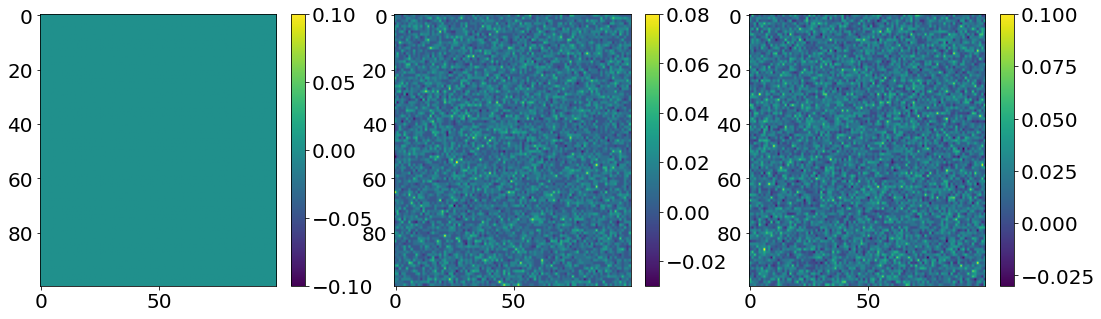

In [421]:
t1 = 0
t2 = 15
t3 = 30

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.imshow(current[:,:,t1],aspect='auto')
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(current[:,:,t2],aspect='auto')
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(current[:,:,t3],aspect='auto')
plt.colorbar()

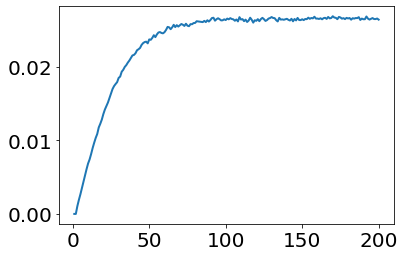

In [422]:
plt.plot(t_l,np.average(current[:,:,:],axis=(0,1)))